# Exploring the dataset containing articles scraped using newspapers3k and bs4 ("dataset_containing_articles_scraped_using_newspaper3k" and "female_athletes_articles_scraped_using_bs4_and_requests")

## Preprocessing on dataset_containing_articles_scraped_using_newspaper3k

In [1]:
import pandas as pd

dataset_file_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\dataset_containing_articles_scraped_using_newspaper3k.csv"

dataset = pd.read_csv(dataset_file_path)

dataset.head()

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No


## Number of rows & columns in dataset_containing_articles_scraped_using_newspaper3k

In [2]:
dataset_rows, dataset_columns = dataset.shape

print("No. of rows in dataset_df : ", dataset_rows)
print("No. of columns in dataset_df : ", dataset_columns)

No. of rows in dataset_df :  214
No. of columns in dataset_df :  8


In [3]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

## Checking all the unique values present in class_2_rows_test_df

In [4]:
unique_vals = dataset["Sr No"].unique()

print(len(unique_vals))

214


In [5]:
unique_vals = dataset["Website"].unique()

print(unique_vals)

['ESPN']


In [6]:
unique_vals = dataset["Category"].unique()

print(unique_vals)

['Cricket' 'tennis']


In [7]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

In [8]:
unique_vals = dataset["Published_Date"].unique()

print(unique_vals)

['2023-09-18' '2023-09-19' '2023-09-12' '2023-09-15' '2023-09-04'
 '29 in 2013' '20 in 2004' '1 in 2015' '37 in 2021' '35 in 2019'
 '11 in 2019' '32 in 2016' '2023-09-21' '2023-09-20' '2023-08-22'
 '2023-08-21' '2023-09-01' '2023-09-17' '2023-09-16' '2023-09-14'
 '2023-09-13']


In [9]:
value_to_search = '20 in 2004'

# Boolean indexing to find rows where column matches the value
result = dataset[dataset["Published_Date"] == value_to_search]

# Displaying the rows where the value is found in column 'B'
print(f"\nRows where value '{value_to_search}' is found in column Published_Date :")
print(result)


Rows where value '20 in 2004' is found in column Published_Date :
     Sr No                                              Title  \
44      45  Title: Mexico 'alien bodies': Those viral arte...   
183    184  Title: Is Canelo Alvarez Slipping Enough For J...   

                                               Content Published_Date Website  \
44   Last week Mexico held its first ever congressi...     20 in 2004    ESPN   
183  Publication Date: 2023-09-20 02:45:55-04:00\n\...     20 in 2004    ESPN   

                             Source_URL Category Bias  
44   https://www.bbc.com/sport/football  Cricket   No  
183         https://bleacherreport.com/   tennis   No  


In [10]:
rows, columns = dataset.shape
print("Rows / Samples : ", rows)
print("Columns / Features : ", columns)

Rows / Samples :  214
Columns / Features :  8


# Data Cleaning

- Handling missing values if present in the textual columns.
- Removing any unnecessary characters, punctuation, or special symbols.
- Converting text to lowercase for consistency.

## Checking the count of missing values in the dataset

## Count of missing values for each column 

In [11]:
count_missing_values = dataset.isnull().sum()
print(count_missing_values)

Sr No             0
Title             0
Content           0
Published_Date    0
Website           0
Source_URL        0
Category          0
Bias              0
dtype: int64


## Count of the number of rows & columns containing at least one missing value.

In [12]:
# to count the number of rows containing at least one missing value

count_rows_missing_val = dataset.isnull().any(axis=1).sum()

print(count_rows_missing_val)

0


In [13]:
# to check if any value in each column (specified by axis=0) of the DataFrame df is True for missing values.

count_cols_missing_val = dataset.isnull().any(axis=0).sum()

print(count_cols_missing_val)

0


## To drop rows containing any missing values & returns a dataframe without those rows

In [14]:
df_without_rows_missing_val = dataset.dropna()

df_without_rows_missing_val

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
...,...,...,...,...,...,...,...,...
209,210,Title: Shakur Stevenson - Frank Martin Fight P...,Publication Date: 2023-09-09 21:44:14-04:00\n\...,2023-09-14,ESPN,https://bleacherreport.com/,tennis,No
210,211,Title: Terence Crawford: 'Canelo Vs Crawford I...,Publication Date: 2023-09-09 20:55:33-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No
211,212,Title: Amanda Serrano To Face Danila Ramos In ...,Publication Date: 2023-09-06 21:18:03-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No
212,213,Title: Shakur Stevenson-Frank Martin Title Fig...,Publication Date: 2023-09-05 16:10:23-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No


In [15]:
rows, columns = df_without_rows_missing_val.shape
print("Rows / Samples : ", rows)
print("Columns / Features : ", columns)

Rows / Samples :  214
Columns / Features :  8


## Printing the columns with missing values

In [16]:
columns_with_missing_vals = dataset.columns[dataset.isnull().any()]

print(columns_with_missing_vals)

Index([], dtype='object')


In [17]:
len(columns_with_missing_vals)

0

# No missing values in our dataset

## Removing the punctuations, special characters, etc from the textual content of the columns

In [18]:
import string

def remove_punctuation(text):
    # removes all punctuation and special characters from the given text.
    return ''.join([char for char in text if char not in string.punctuation]) # Using List comprehension

## Removing punctuations & special characters from Title & Description columns of the dataset

## .apply() : The apply() function in Pandas is used to apply a function to each element (row or column) of a DataFrame.

In [19]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sr No           214 non-null    int64 
 1   Title           214 non-null    object
 2   Content         214 non-null    object
 3   Published_Date  214 non-null    object
 4   Website         214 non-null    object
 5   Source_URL      214 non-null    object
 6   Category        214 non-null    object
 7   Bias            214 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.5+ KB


In [21]:
dataset.head()

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No


In [22]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

## Dropping a few unnecessary columns from the dataset

In [23]:
# Dropping multiple columns 
columns_to_drop = ['Published_Date', 'Website', 'Source_URL', 'Category', 'Bias']
df_all = dataset.drop(columns=columns_to_drop)

# Displaying the DataFrame after dropping the columns
print("\nDataFrame after dropping columns:", columns_to_drop)
print(df_all)


DataFrame after dropping columns: ['Published_Date', 'Website', 'Source_URL', 'Category', 'Bias']
     Sr No                                              Title  \
0        1  Title: New line-up of Louis Theroux interviews...   
1        2  Title: Strictly Come Dancing 2023 Judges celeb...   
2        3  Title: How did tea become the nation's favouri...   
3        4  Title: Teenager making flags of the world out ...   
4        5                                    Title: BBC News   
..     ...                                                ...   
209    210  Title: Shakur Stevenson - Frank Martin Fight P...   
210    211  Title: Terence Crawford: 'Canelo Vs Crawford I...   
211    212  Title: Amanda Serrano To Face Danila Ramos In ...   
212    213  Title: Shakur Stevenson-Frank Martin Title Fig...   
213    214  Title: “It’s Slow, I Won’t Lie,” Eddie Hearn T...   

                                               Content  
0    BBC Factual announces six names that meet mult...  
1    L

In [24]:
df_all.columns

Index(['Sr No', 'Title', 'Content'], dtype='object')

## Renaming columns in dataset_containing_articles_scraped_using_newspaper3k to match it with female_athletes_articles_scraped_using_bs4_and_requests

In [25]:
# Renaming multiple columns
new_column_names = {'Title': 'Headline', 'Content': 'Complete Article'}
df_all = df_all.rename(columns=new_column_names)

# Displaying the DataFrame after renaming multiple columns
print("\nDataFrame after renaming multiple columns:")
print(df_all)


DataFrame after renaming multiple columns:
     Sr No                                           Headline  \
0        1  Title: New line-up of Louis Theroux interviews...   
1        2  Title: Strictly Come Dancing 2023 Judges celeb...   
2        3  Title: How did tea become the nation's favouri...   
3        4  Title: Teenager making flags of the world out ...   
4        5                                    Title: BBC News   
..     ...                                                ...   
209    210  Title: Shakur Stevenson - Frank Martin Fight P...   
210    211  Title: Terence Crawford: 'Canelo Vs Crawford I...   
211    212  Title: Amanda Serrano To Face Danila Ramos In ...   
212    213  Title: Shakur Stevenson-Frank Martin Title Fig...   
213    214  Title: “It’s Slow, I Won’t Lie,” Eddie Hearn T...   

                                      Complete Article  
0    BBC Factual announces six names that meet mult...  
1    L-R: Craig Revel Horwood, Shirley Ballas, Mots...  
2   

In [26]:
df_all.head()

,Sr No,Headline,Complete Article
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots..."
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu..."
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...


## Loading the female_athletes_articles_scraped_using_bs4_and_requests dataset

In [27]:
file_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\female_athletes_articles_scraped_using_bs4_and_requests.csv"

female_dataset = pd.read_csv(file_path)

female_dataset.head()

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...


In [28]:
female_dataset.head(50)

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
8,9,"Best bra brands in India (November, 2023)",Lingerie is the most intimate and integral par...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...


In [30]:
bbc_sports = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\articles_scraped_using_bs4_and_requests\\bbc_sports_articles.csv"

bbc_sports_dataset = pd.read_csv(bbc_sports)

bbc_sports_dataset.head()

,Sr No,Headline,Complete Article
0,1,Athlete set to become the first Manx professio...,A Commonwealth Games athlete is set to become ...
1,2,CTE: Brain disease diagnosed in female athlete...,Jade Burden's bid for a licence has been appro...


## Combining female_sports_articles & bbc_sports_articles datasets

In [31]:
combined_df = pd.concat([female_dataset, bbc_sports_dataset], ignore_index=True)

In [32]:
rows, columns = combined_df.shape
print("Rows : ", rows)
print("Columns : ", columns)

Rows :  48
Columns :  3


In [33]:
combined_df

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
8,9,"Best bra brands in India (November, 2023)",Lingerie is the most intimate and integral par...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...


In [34]:
indexes_of_rows_to_remove = [1, 8, 22, 24, 26, 27, 28, 29, 30, 34, 41]

df = combined_df.drop(indexes_of_rows_to_remove)


In [35]:
df.columns

Index(['Sr No', 'Headline', 'Complete Article'], dtype='object')

In [36]:
df

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...
10,11,Agility training equipment for sports persons ...,Agility training is an essential aspect of ath...
11,12,World Athletics set to tighten transgender rul...,PARIS: World Athletics are likely to tighten r...


In [37]:
df_all.describe()

,Sr No
count,214.000000
mean,107.500000
std,61.920648
min,1.000000
25%,54.250000
50%,107.500000
75%,160.750000
max,214.000000


In [38]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sr No             214 non-null    int64 
 1   Headline          214 non-null    object
 2   Complete Article  214 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


### Dropping the Sr No column from the dataframe

In [39]:
columns_to_drop = ['Sr No'] # We can add multiple columns that we want to drop here

# Drop the specified column(s)
df.drop(columns=columns_to_drop, inplace=True)

# If you want to create a new DataFrame without modifying the original one, you can do:
# df_new = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df)

                                             Headline  \
0   Saiyami Kher pledges her support for young fem...   
2   Water Shoes For Men For Water Sports and Other...   
3   Asian Games: Wushu athlete goes incommunicado,...   
4   Top female para-athletes allege ‘mental harass...   
5   Rajasthan Royals plans to launch new professio...   
6   Saiyami Kher promises to support young female ...   
7                    Manu signs off in splendid style   
9   KIUG: 102 athletes from 17 univs to take part ...   
10  Agility training equipment for sports persons ...   
11  World Athletics set to tighten transgender rul...   
12               CG wins All-India forest sports meet   
13      Cops showcase talent onDay 2 of athletic meet   
14  Setting lofty standards, can India breach the ...   
15                           Good show by AP athletes   
16  Once nursery of Sakshi Malik, Rohtak stadium n...   
17  Govt taking all steps for safety of women athl...   
18  England, New Zealand Women'

In [40]:
df.columns

Index(['Headline', 'Complete Article'], dtype='object')

In [41]:
print(df)

                                             Headline  \
0   Saiyami Kher pledges her support for young fem...   
2   Water Shoes For Men For Water Sports and Other...   
3   Asian Games: Wushu athlete goes incommunicado,...   
4   Top female para-athletes allege ‘mental harass...   
5   Rajasthan Royals plans to launch new professio...   
6   Saiyami Kher promises to support young female ...   
7                    Manu signs off in splendid style   
9   KIUG: 102 athletes from 17 univs to take part ...   
10  Agility training equipment for sports persons ...   
11  World Athletics set to tighten transgender rul...   
12               CG wins All-India forest sports meet   
13      Cops showcase talent onDay 2 of athletic meet   
14  Setting lofty standards, can India breach the ...   
15                           Good show by AP athletes   
16  Once nursery of Sakshi Malik, Rohtak stadium n...   
17  Govt taking all steps for safety of women athl...   
18  England, New Zealand Women'

In [42]:
df.reset_index(drop=True, inplace= True)

In [43]:
df

,Headline,Complete Article
0,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
2,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
3,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
4,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
5,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
6,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
7,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...
8,Agility training equipment for sports persons ...,Agility training is an essential aspect of ath...
9,World Athletics set to tighten transgender rul...,PARIS: World Athletics are likely to tighten r...


### Dropping the Sr No column from the df_all dataframe

In [44]:
# Drop the specified column(s)
df_all.drop(columns=["Sr No"], inplace=True)

In [45]:
df_all.columns

Index(['Headline', 'Complete Article'], dtype='object')

### Now combining the df_all dataframe (containing the articles scraped using newspaper3k) & df (this dataframe contains the sports articles related to female athletes that we extracted from TOI, BBC & NDTV)

In [46]:
final_dataset = pd.concat([df_all, df], ignore_index=True)

In [47]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Headline          251 non-null    object
 1   Complete Article  251 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [48]:
final_dataset.columns

Index(['Headline', 'Complete Article'], dtype='object')

In [49]:
final_dataset.describe()

,Headline,Complete Article
count,251,251
unique,214,221
top,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...
freq,8,6


In [50]:
unique_vals = final_dataset['Complete Article'].unique()

print(len(unique_vals))

221


In [51]:
unique_vals = final_dataset['Headline'].unique()

print(len(unique_vals))

214


In [52]:
count_missing_values = final_dataset.isnull().sum()
print(count_missing_values)

Headline            0
Complete Article    0
dtype: int64


In [97]:
final_dataset.to_csv("C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged.csv", index=False)

<hr><hr>

### Now, we will do all the analysis on this dataset that we have created by merging our original dataset (created using newspaper3k) & the female athletes articles dataset (obtained from NDTV, TOI & BBC). the dataset has been named "3k_dataset_and_female_dataset_merged"

In [53]:
dataset_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged.csv"

data_to_analyse = pd.read_csv(dataset_path)

In [54]:
data_to_analyse.head()

,Headline,Complete Article
0,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...
1,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots..."
2,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu..."
3,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...
4,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...


In [55]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Headline          251 non-null    object
 1   Complete Article  251 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


### Identify the gender of the athletes in every row of the dataset from the content of the Complete Article column using a model from huggingface

In [56]:
from transformers import pipeline

# Create the text classification pipeline
classifier = pipeline("text-classification", model="datalearningpr/name_to_gender")

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [198]:
# Function to classify gender for a given description
def classify_gender(description):
    # Use the pipeline to classify gender for the description
    result = classifier(description)
    
    # Extract the gender label from the result
    gender = result[0]['label']
    
    # Return the gender label
    return gender

### Checking the details about the model being used

In [201]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "datalearningpr/name_to_gender"  # Replace with your model name or path

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Get the model's configuration
model_config = model.config

# Print relevant configuration details
print("Model Configuration:")
print(f"Maximum Sequence Length: {model_config.max_position_embeddings}")


Model Configuration:
Maximum Sequence Length: 512


In [202]:
# Get tokenizer configuration details
tokenizer_config = tokenizer.model_max_length  # or other relevant attributes/methods

# Print tokenizer configuration details
print("Tokenizer Configuration:")
print(f"Maximum Sequence Length: {tokenizer_config}")

Tokenizer Configuration:
Maximum Sequence Length: 512


### Creating another column named "Processed Article" that would contain a version of the "Complete Article" column's every row's content that we can provide the model being used for identifying the Gender in each article of our dataset

In [203]:
# Load the tokenizer and specify the maximum sequence length
max_sequence_length = 512  # Maximum sequence length supported by the model

# Truncate or pad each 'Complete Article' text to fit within the maximum sequence length
def preprocess_text(text):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    return tokenized_text

# Apply the preprocessing function to the 'Complete Article' column
data_to_analyse['Processed Article'] = data_to_analyse['Complete Article'].apply(preprocess_text)


In [204]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Headline           251 non-null    object
 1   Complete Article   251 non-null    object
 2   Processed Article  251 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [206]:
# Convert tokenized representations back to text
def decode_tokenized_text(tokenized_text):
    return tokenizer.decode(tokenized_text, skip_special_tokens=True)

# Apply the decoding function to the 'Processed Article' column
data_to_analyse['Processed Article Content'] = data_to_analyse['Processed Article'].apply(decode_tokenized_text)

# Apply the classify_gender function to each row in the DataFrame using the text data
data_to_analyse['Gender'] = data_to_analyse['Processed Article Content'].apply(classify_gender)

# Save the updated DataFrame with the 'Gender' column
data_to_analyse.to_csv('C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged_with_gender_col.csv', index=False)


In [57]:
data_to_analyse = pd.read_csv("C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged_with_gender_col.csv")

In [58]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Headline                   251 non-null    object
 1   Complete Article           251 non-null    object
 2   Processed Article          251 non-null    object
 3   Processed Article Content  251 non-null    object
 4   Gender                     251 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [59]:
data_to_analyse.head(20)

,Headline,Complete Article,Processed Article,Processed Article Content,Gender
0,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,"[101, 100, 100, 12276, 9857, 9056, 8118, 10883...",announces six names that meet multi award - wi...,female
1,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...","[101, 100, 118, 100, 131, 100, 100, 100, 117, ...","- :,, and du ( : / ) nights are even more fab ...",female
2,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...","[101, 100, 8480, 9531, 13048, 8134, 12569, 915...","may have some complicated connotations, but on...",female
3,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,"[101, 100, 11330, 8374, 9289, 8670, 10744, 100...",teenager from north is creating the flags of t...,female
4,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female
5,Title: Nine things we learned from Adrian Edmo...,5. Shakespeare saved him from being kicked out...,"[101, 126, 119, 100, 13069, 8168, 8913, 8175, ...","5. saved him from being kicked out of school ""...",female
6,Title: Five unbelievable ways longevity pionee...,1. Stitching old and young mice together\n\nYe...,"[101, 122, 119, 100, 10404, 8256, 9802, 10551,...","1. old and young mice together, this one s as ...",female
7,Title: Mexico 'alien bodies': Those viral arte...,Last week Mexico held its first ever congressi...,"[101, 100, 10090, 100, 9245, 8635, 12894, 9555...",week held its first ever congressional hearing...,female
8,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female
9,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female


In [60]:
count_male_rows = data_to_analyse[data_to_analyse['Gender'] == 'male'].shape[0]
print("Count of rows with 'male' in Gender column:", count_male_rows)

Count of rows with 'male' in Gender column: 97


In [61]:
count_female_rows = data_to_analyse[data_to_analyse['Gender'] == 'female'].shape[0]
print("Count of rows with 'female' in Gender column:", count_female_rows)

Count of rows with 'female' in Gender column: 154


<hr><hr>

In [109]:
dataset['Title'] = dataset['Title'].apply(remove_punctuation)

In [110]:
dataset.head(5)

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title New lineup of Louis Theroux interviews a...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title Strictly Come Dancing 2023 Judges celebr...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title How did tea become the nations favourite...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title Teenager making flags of the world out o...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No


In [111]:
dataset['Title'][2]

'Title How did tea become the nations favourite drink'

- (df['text_column1'].apply(remove_punctuation)) : here, apply() is applied to each element within the 'text_column1' column (along the column (vertically)), so specifying axis is not necessary as it's the default behavior.

- The apply() method in Pandas operates by default on columns (along axis=0), allowing you to apply a function to each column separately. When you apply a function to a column using apply(), it's implied that the operation is being performed along the columns (vertically).

- However, if you intend to apply a function to each row (horizontally), you'd need to specify axis=1 explicitly. 

## Converting textual content of the Title & Description columns into lowercase

- .str.lower(): The .str accessor allows you to apply string methods to each element of the selected column. In this case, .lower() is a string method that converts all characters in the string to lowercase.

In [112]:
dataset['Title'] = dataset['Title'].str.lower()

In [113]:
dataset['Description'] = dataset['Description'].str.lower()

KeyError: 'Description'

In [ ]:
dataset.head()

,Class Index,Title,Description
0,2,giddy phelps touches gold for first time,michael phelps won the gold medal in the 400 i...
1,2,tougher rules wont soften laws game,foxborough looking at his ridiculously develo...
2,2,shoppach doesnt appear ready to hit the next l...,with the weeks dwindling until jason varitek e...
3,2,mighty ortiz makes sure sox can rest easy,just imagine what david ortiz could do on a go...
4,2,theyve caught his eye,in quothelping themselves quot ricky bryant c...


## Creating the wordclouds for Title & Description Columns

## Title column wordcloud

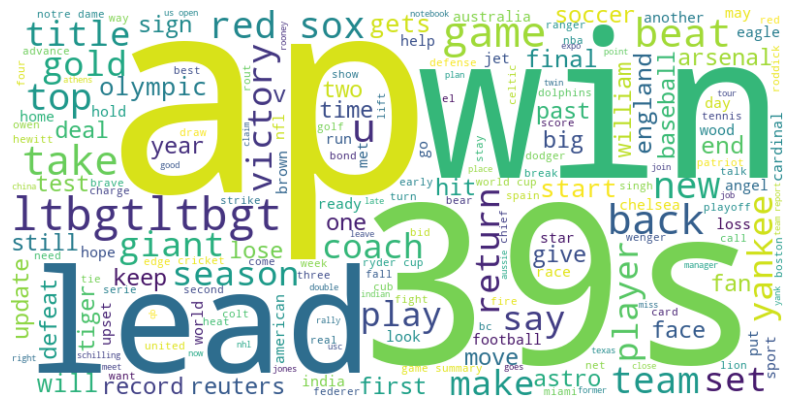

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_all_content = " ".join(dataset['Title'])
title_cloud = WordCloud(width=800, height=400, background_color="white").generate(title_all_content)

plt.figure(figsize=(10, 8))
plt.imshow(title_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


- interpolation='bilinear': The interpolation parameter specifies the interpolation method used to display the image. In this case, 'bilinear' is used, which provides a smoother image by linearly interpolating between pixels.

- plt.axis(): This function in Matplotlib controls the appearance and behavior of the axes of the plot. Setting the parameter to 'off' hides the axes (both x and y axes) in the plot.

- Interpolation, in the context of image processing or visualization, refers to the method used to estimate the values of pixels at non-grid positions based on the known values at neighboring grid positions. It helps create a smoother and more continuous representation of an image or data.

- Bilinear interpolation is a specific type of interpolation method commonly used in image processing. When you resize or scale an image, bilinear interpolation calculates the values of new pixels by taking a weighted average of the nearest four known pixels in a 2x2 grid surrounding the desired position.

- Bilinear interpolation helps in creating a smoother appearance when resizing images compared to simpler methods like nearest-neighbor interpolation. It reduces pixelation and blockiness in the resulting image by considering a weighted blend of nearby pixels, resulting in a more continuous transition between pixels at different positions.

## Description column wordcloud

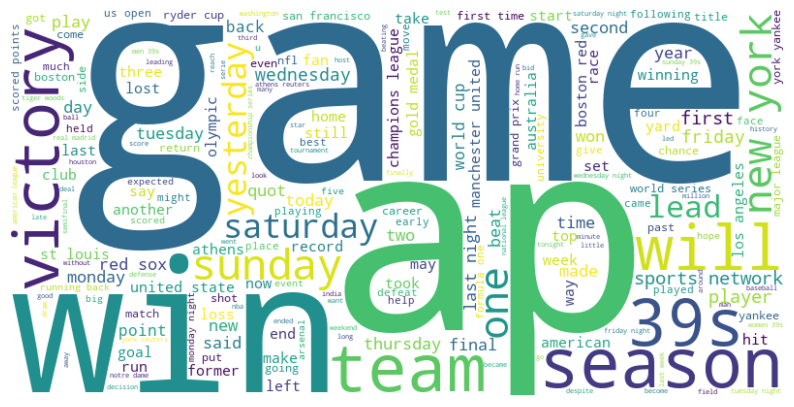

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

desc_all_content = " ".join(dataset['Description'])

desc_cloud = WordCloud(width=800, height=400, background_color="white").generate(desc_all_content)

plt.figure(figsize=(10, 8))
plt.imshow(desc_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Categorizing articles into Male, Female & Neutral category based on the article content in Description column

In [ ]:
import spacy

- en_core_web_sm is a specific English language model provided by the SpaCy library. 
- Language Model: en_core_web_sm specifically denotes the English language model ('en' for English).
- Model Type and Size: The 'core' refers to the model type, and 'web_sm' refers to its specific variant, 'small' in this case. The 'small' model is a smaller version compared to larger models like 'md' (medium) or 'lg' (large), designed for efficiency and faster processing, suitable for many NLP tasks while consuming fewer resources.
- This particular model (en_core_web_sm) contains word vectors, syntax, named entities, and other linguistic annotations useful for various NLP tasks.

In [ ]:
nlp_model = spacy.load("en_core_web_sm")

In [ ]:
# Define lists of keywords for each category 
male_keywords = ['male', 'man', 'men', 'boy', 'he', 'his', 'him', 'sportsman']
female_keywords = ['female', 'woman', 'women', 'girl', 'she', 'her', 'sportswoman']

- The below given function counts how many times any of the keywords from the male_keywords list appears in the text content, irrespective of the specific keyword.

- The below given function counts how many times any of the keywords from the female_keywords list appears in the text content, irrespective of the specific keyword.

- text.lower(): This converts the entire text into lowercase. Using .lower() ensures case insensitivity while counting occurrences of keywords.
- List Comprehension: [text.lower().count(keyword) for keyword in male_keywords]
- This list comprehension iterates through each keyword in the male_keywords list.
- For each keyword, it calculates the count of occurrences of that keyword in the lowercase version of the text.
- sum(): This function calculates the sum of all counts obtained from counting each keyword in the male_keywords list within the text.

In [ ]:
def categorize_gender(text):
    male_count = sum([text.count(keyword) for keyword in male_keywords])
    female_count = sum([text.count(keyword) for keyword in female_keywords])

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Neutral'

In [ ]:
dataset['Desc Athlete Gender'] = dataset['Description'].apply(categorize_gender)

In [ ]:
dataset.head()

,Class Index,Title,Description,Desc Athlete Gender
0,2,giddy phelps touches gold for first time,michael phelps won the gold medal in the 400 i...,Male
1,2,tougher rules wont soften laws game,foxborough looking at his ridiculously develo...,Male
2,2,shoppach doesnt appear ready to hit the next l...,with the weeks dwindling until jason varitek e...,Male
3,2,mighty ortiz makes sure sox can rest easy,just imagine what david ortiz could do on a go...,Male
4,2,theyve caught his eye,in quothelping themselves quot ricky bryant c...,Male


- The value_counts() function in Pandas is used to count the occurrences of unique values in a Series (a single column of a DataFrame) and returns a new Series containing counts of unique values in descending order.

In [ ]:
label_counts = dataset['Desc Athlete Gender'].value_counts()

In [ ]:
male_count = label_counts['Male']
female_count = label_counts['Female']
neutral_count = label_counts['Neutral']

print("Male occurrences count : ", male_count)
print("Female occurrences count : ", female_count)
print("Neutral occurrences count : ", neutral_count)

Male occurrences count :  30870
Female occurrences count :  9
Neutral occurrences count :  1021


## Topic Modelling on content of rows labelled as Male

In [ ]:
male_descriptions = dataset[dataset['Desc Athlete Gender'] == 'Male']['Description'].tolist()

In [ ]:
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize, remove stopwords, and create a list of tokenized documents
stop_words = set(stopwords.words('english'))
tokenized_data = [
    [token for token in word_tokenize(doc.lower()) if token not in stop_words and token.isalpha()]
    for doc in male_descriptions
]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

In [ ]:
import gensim

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.015*"sports" + 0.011*"network" + 0.009*"ap" + 0.009*"contract" + 0.008*"season" + 0.006*"left" + 0.006*"million" + 0.006*"back" + 0.006*"friday" + 0.006*"sunday"
Topic 1: 0.012*"test" + 0.011*"champions" + 0.011*"england" + 0.010*"league" + 0.009*"first" + 0.009*"cup" + 0.007*"united" + 0.007*"club" + 0.007*"manchester" + 0.007*"australia"
Topic 2: 0.016*"new" + 0.014*"night" + 0.014*"points" + 0.012*"york" + 0.010*"victory" + 0.010*"game" + 0.010*"red" + 0.009*"sox" + 0.009*"scored" + 0.009*"win"
Topic 3: 0.016*"world" + 0.011*"cup" + 0.008*"champion" + 0.007*"one" + 0.007*"first" + 0.006*"final" + 0.006*"olympic" + 0.006*"open" + 0.006*"title" + 0.006*"us"
Topic 4: 0.014*"coach" + 0.010*"team" + 0.008*"season" + 0.008*"football" + 0.008*"players" + 0.007*"last" + 0.007*"one" + 0.007*"new" + 0.006*"game" + 0.006*"ap"


In [ ]:
topics = {
    'Topic 0': {
        'sports': 0.015, 'network': 0.011, 'ap': 0.009, 'contract': 0.009,
        'season': 0.008, 'left': 0.006, 'million': 0.006, 'back': 0.006,
        'friday': 0.006, 'sunday': 0.006
    },
    'Topic 1': {
        'test': 0.012, 'champions': 0.011, 'england': 0.011, 'league': 0.010,
        'first': 0.009, 'cup': 0.009, 'united': 0.007, 'club': 0.007,
        'manchester': 0.007, 'australia': 0.007
    },
    'Topic 2': {
        'new': 0.016, 'night': 0.014, 'points': 0.014, 'york': 0.012,
        'victory': 0.010, 'game': 0.010, 'red': 0.010, 'sox': 0.009,
        'scored': 0.009, 'win': 0.009
    },
    'Topic 3': {
        'world': 0.016, 'cup': 0.011, 'champion': 0.008, 'one': 0.007,
        'first': 0.007, 'final': 0.006, 'olympic': 0.006, 'open': 0.006,
        'title': 0.006, 'us': 0.006
    },
    'Topic 4': {
        'coach': 0.014, 'team': 0.010, 'season': 0.008, 'football': 0.008,
        'players': 0.008, 'last': 0.007, 'one': 0.007, 'new': 0.007,
        'game': 0.006, 'ap': 0.006
    }
}

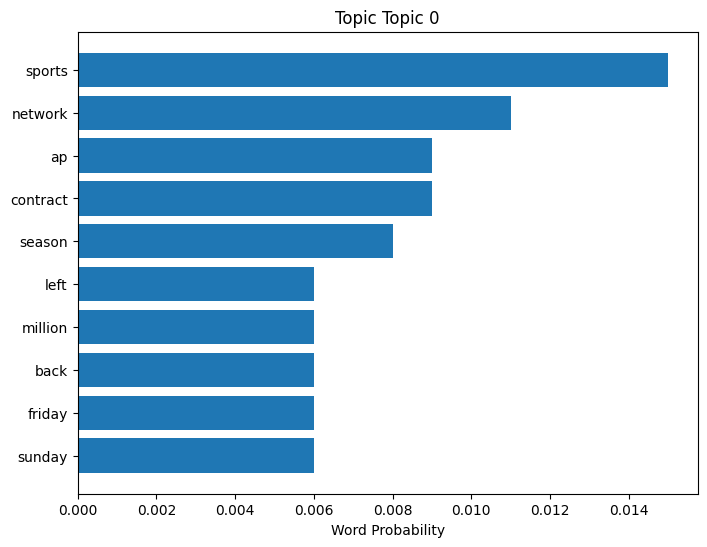

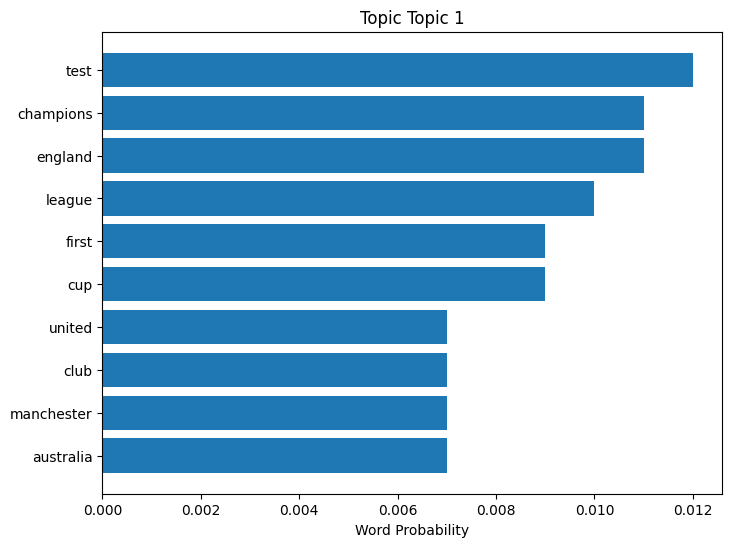

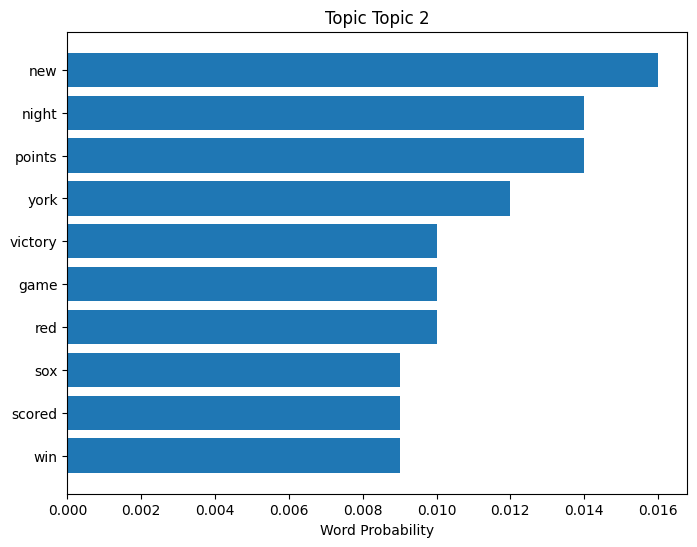

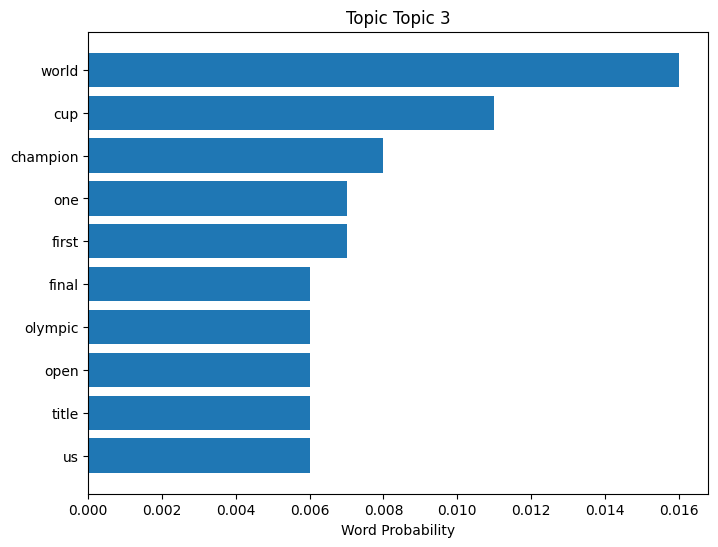

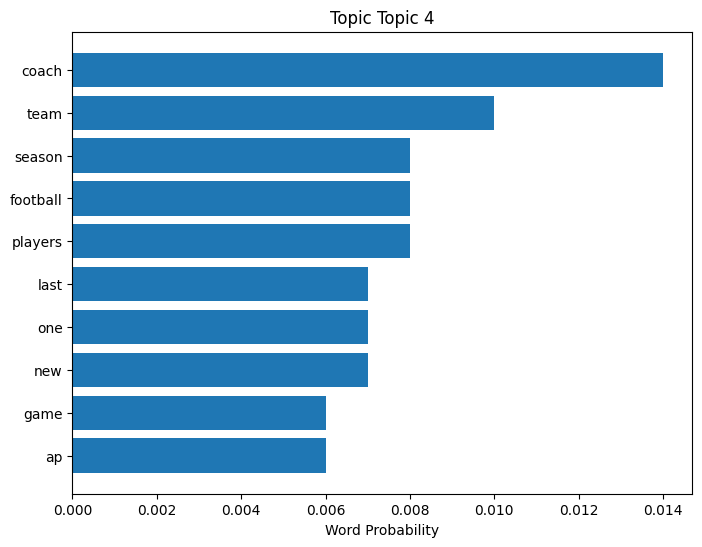

In [ ]:
import matplotlib.pyplot as plt

# Looping through each topic and its word probabilities
for topic, word_probs in topics.items():
    # Sorting words and their probabilities in descending order
    sorted_words = sorted(word_probs, key=word_probs.get, reverse=True)
    sorted_probs = [word_probs[word] for word in sorted_words]

    # Plotting bar graph for each topic
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_words[:10], sorted_probs[:10])  # Top 10 words in the topic
    plt.gca().invert_yaxis()  # Invert y-axis to show the most significant words at the top
    plt.xlabel('Word Probability')
    plt.title(f'Topic {topic}')
    plt.show()

## Topic Modelling on content of rows labelled as Female

In [ ]:
female_descriptions = dataset[dataset['Desc Athlete Gender'] == 'Female']['Description'].tolist()

In [ ]:
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize, remove stopwords, and create a list of tokenized documents
stop_words = set(stopwords.words('english'))
tokenized_data = [
    [token for token in word_tokenize(doc.lower()) if token not in stop_words and token.isalpha()]
    for doc in female_descriptions
]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

In [ ]:
import gensim

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.021*"contract" + 0.021*"coach" + 0.021*"football" + 0.021*"deberry" + 0.021*"fiveyear" + 0.021*"air" + 0.021*"thursday" + 0.021*"extension" + 0.021*"ap" + 0.021*"agreed"
Topic 1: 0.026*"last" + 0.026*"said" + 0.026*"sheriff" + 0.026*"high" + 0.026*"school" + 0.026*"involved" + 0.026*"game" + 0.026*"charges" + 0.026*"tuesday" + 0.026*"probably"
Topic 2: 0.026*"county" + 0.026*"tennis" + 0.026*"us" + 0.026*"sheriff" + 0.026*"support" + 0.026*"former" + 0.026*"official" + 0.026*"star" + 0.026*"pay" + 0.026*"tanner"
Topic 3: 0.033*"fisher" + 0.033*"vermeil" + 0.018*"nashville" + 0.018*"time" + 0.018*"xxxiv" + 0.018*"one" + 0.018*"first" + 0.018*"live" + 0.018*"tennessee" + 0.018*"meeting"
Topic 4: 0.036*"daly" + 0.036*"nl" + 0.027*"p" + 0.027*"colorado" + 0.019*"money" + 0.019*"oxford" + 0.019*"miller" + 0.019*"pleaded" + 0.019*"guilty" + 0.019*"laundering"


In [ ]:
topics_2 = {
    'Topic 0': {
        'contract': 0.021, 'coach': 0.021, 'football': 0.021, 'deberry': 0.021,
        'fiveyear': 0.021, 'air': 0.021, 'thursday': 0.021, 'extension': 0.021,
        'ap': 0.021, 'agreed': 0.021
    },
    'Topic 1': {
        'last': 0.026, 'said': 0.026, 'sheriff': 0.026, 'high': 0.026,
        'school': 0.026, 'involved': 0.026, 'game': 0.026, 'charges': 0.026,
        'tuesday': 0.026, 'probably': 0.026
    },
    'Topic 2': {
        'county': 0.026, 'tennis': 0.026, 'us': 0.026, 'sheriff': 0.026,
        'support': 0.026, 'former': 0.026, 'official': 0.026, 'star': 0.026,
        'pay': 0.026, 'tanner': 0.026
    },
    'Topic 3': {
        'fisher': 0.033, 'vermeil': 0.033, 'nashville': 0.018, 'time': 0.018,
        'xxxiv': 0.018, 'one': 0.018, 'first': 0.018, 'live': 0.018,
        'tennessee': 0.018, 'meeting': 0.018
    },
    'Topic 4': {
        'daly': 0.036, 'nl': 0.036, 'p': 0.027, 'colorado': 0.027,
        'money': 0.019, 'oxford': 0.019, 'miller': 0.019, 'pleaded': 0.019,
        'guilty': 0.019, 'laundering': 0.019
    }
}

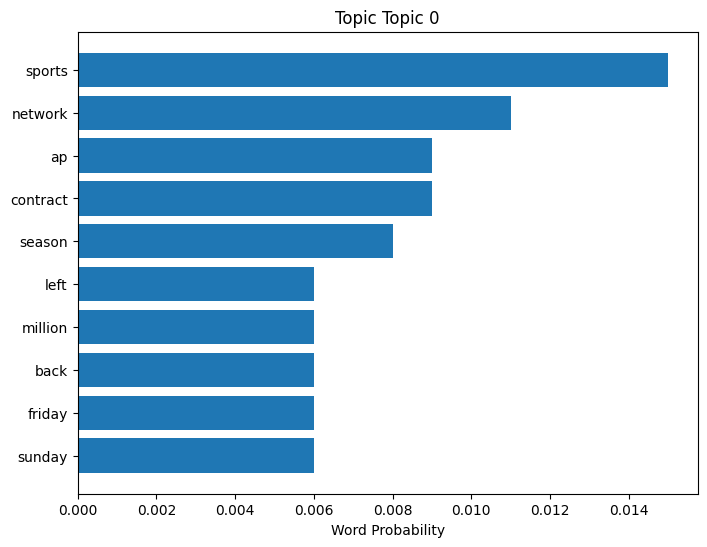

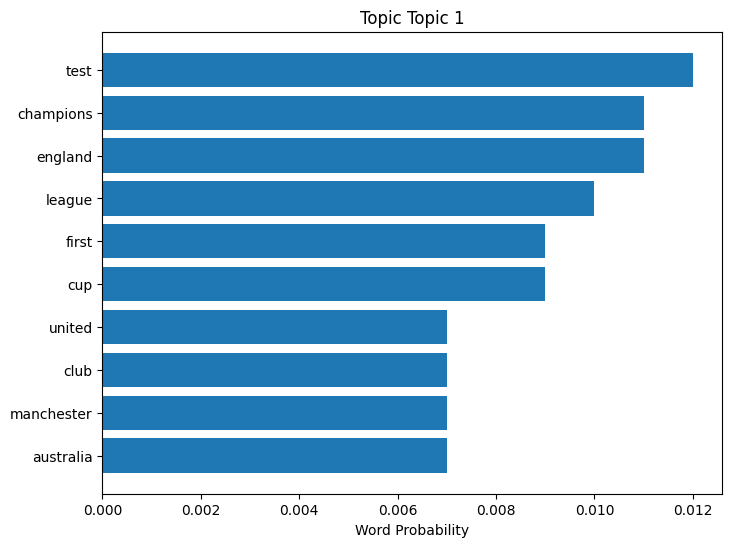

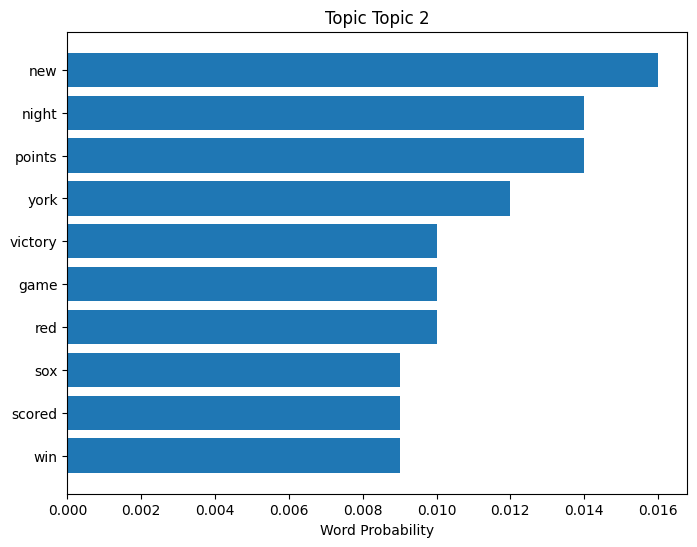

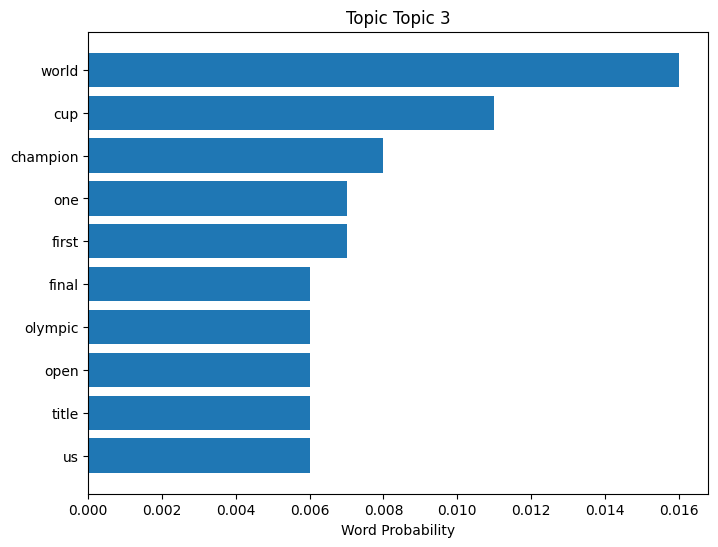

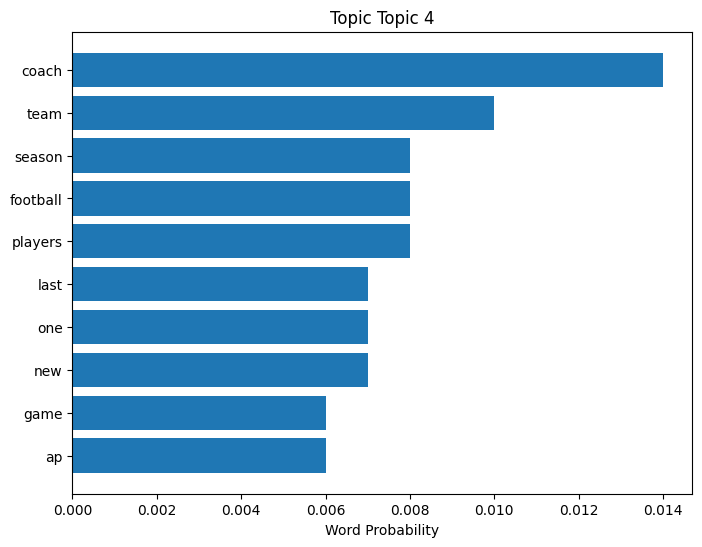

In [ ]:
import matplotlib.pyplot as plt

# Looping through each topic and its word probabilities
for topic, word_probs in topics.items():
    # Sorting words and their probabilities in descending order
    sorted_words = sorted(word_probs, key=word_probs.get, reverse=True)
    sorted_probs = [word_probs[word] for word in sorted_words]

    # Plotting bar graph for each topic
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_words[:10], sorted_probs[:10])  # Top 10 words in the topic
    plt.gca().invert_yaxis()  # Invert y-axis to show the most significant words at the top
    plt.xlabel('Word Probability')
    plt.title(f'Topic {topic}')
    plt.show()

## Sentiment analysis on every row of Description column labelled as Male

In [ ]:
from textblob import TextBlob

# Filter rows where 'Desc Athlete Gender' is 'Male'
male_descriptions = dataset[dataset['Desc Athlete Gender'] == 'Male']['Description']

# Perform sentiment analysis
sentiments = []
for description in male_descriptions:
    analysis = TextBlob(description)
    # Get the sentiment polarity (ranges from -1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    sentiments.append(sentiment_polarity)

# Create a new column 'Sentiment' in the original DataFrame for male descriptions
dataset.loc[dataset['Desc Athlete Gender'] == 'Male', 'Sentiment'] = sentiments

# Display the DataFrame with the Sentiment column for male descriptions
print(dataset[dataset['Desc Athlete Gender'] == 'Male'][['Description', 'Sentiment']])

                                             Description  Sentiment
0      michael phelps won the gold medal in the 400 i...   0.000000
1      foxborough  looking at his ridiculously develo...   0.187346
2      with the weeks dwindling until jason varitek e...   0.160000
3      just imagine what david ortiz could do on a go...   0.125000
4      in  quothelping themselves quot ricky bryant c...   0.000000
...                                                  ...        ...
31895   val gardena italy reuters  max rauffer became...   0.287500
31896  red sox general manager theo epstein acknowled...   0.008333
31897  the miami dolphins will put their courtship of...  -0.150000
31898  pittsburgh at ny giants time 130 pm line steel...   0.166667
31899  indianapolis  allstar vince carter was traded ...   0.136364

[30870 rows x 2 columns]


In [ ]:
dataset.head()

,Class Index,Title,Description,Desc Athlete Gender,Sentiment
0,2,giddy phelps touches gold for first time,michael phelps won the gold medal in the 400 i...,Male,0.000000
1,2,tougher rules wont soften laws game,foxborough looking at his ridiculously develo...,Male,0.187346
2,2,shoppach doesnt appear ready to hit the next l...,with the weeks dwindling until jason varitek e...,Male,0.160000
3,2,mighty ortiz makes sure sox can rest easy,just imagine what david ortiz could do on a go...,Male,0.125000
4,2,theyve caught his eye,in quothelping themselves quot ricky bryant c...,Male,0.000000


## Sentiment analysis graph for Male athlete articles 

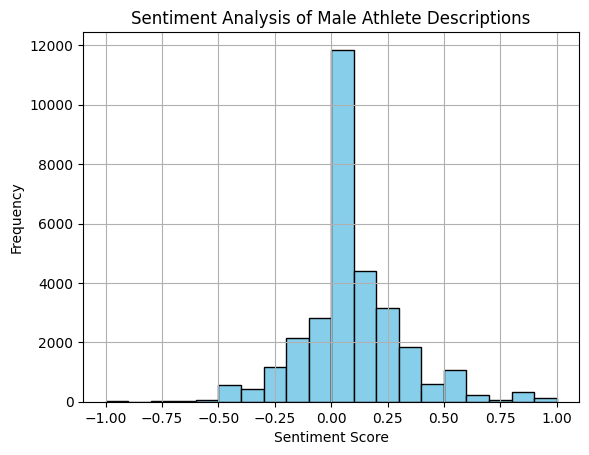

In [ ]:
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Male Athlete Descriptions')
plt.grid(True)
plt.show()


## Average sentiment score for male athletes articles

In [ ]:
import statistics
average_sentiment = statistics.mean(sentiments)
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.08451905616500835


- An average sentiment score of approximately 0.084 suggests a generally positive sentiment in the analyzed text data.

- Sentiment scores typically range from -1 to 1, where:

    - Values close to 1 indicate highly positive sentiment.
    - Values close to -1 indicate highly negative sentiment.
    - Values around 0 suggest a more neutral sentiment.

- In this case, the average sentiment score being around 0.084 indicates a positive sentiment overall, but it might not be significantly positive.

## Sentiment analysis on every row of Description column labelled as Female

In [ ]:
# Filter rows where 'Desc Athlete Gender' is 'Male'
male_descriptions = dataset[dataset['Desc Athlete Gender'] == 'Female']['Description']

# Perform sentiment analysis
sentiments = []
for description in male_descriptions:
    analysis = TextBlob(description)
    # Get the sentiment polarity (ranges from -1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    sentiments.append(sentiment_polarity)

# Create a new column 'Sentiment' in the original DataFrame for male descriptions
dataset.loc[dataset['Desc Athlete Gender'] == 'Female', 'Sentiment'] = sentiments

# Display the DataFrame with the Sentiment column for male descriptions
print(dataset[dataset['Desc Athlete Gender'] == 'Female'][['Description', 'Sentiment']])

                                             Description  Sentiment
4541   former us tennis star roscoe tanner has been a...  -0.050000
5755   knee sprain to keep no 1 scoring defense 39s b...   1.000000
5846   baseball boston al claimed p tim bausher on wa...  -0.050000
7574   ap  air force football coach fisher deberry ag...   0.000000
8804   tina thompson scored 27 points and sheryl swoo...   0.000000
23903  oxford ms sports network  john daly 39s wife s...  -0.500000
23920  oxford miss  sherrie miller daly wife of profe...  -0.200000
29157  a fight between players and fans at a high sch...  -0.080000
30620  nashville tennessee ticker  dick vermeil and j...   0.118939


## Sentiment analysis graph for Female athlete articles 

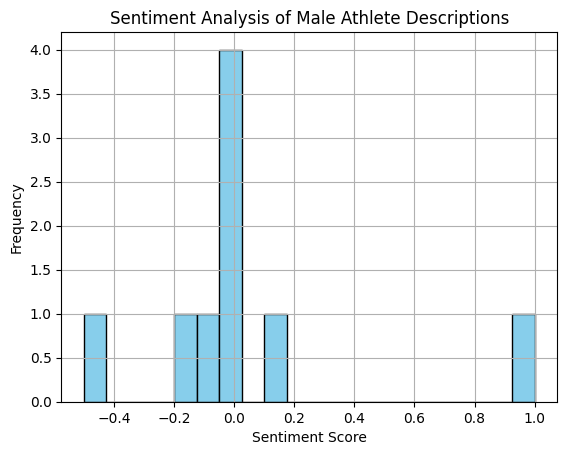

In [ ]:
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Male Athlete Descriptions')
plt.grid(True)
plt.show()

## Average sentiment score for Female athletes articles

In [ ]:
import statistics
average_sentiment = statistics.mean(sentiments)
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.026548821548821547


- In this case, a score of around 0.027 indicates a sentiment that leans slightly towards positivity but is not notably strong. It might imply a more neutral or mildly positive tone in the analyzed text data.

In [ ]:
from transformers import pipeline
import pandas as pd

dataset = pd.read_csv('C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Darsh Damani - New Gender Bias In Sports Articles\\final_analysis_darsh_and_female_dataset\\cleaner_dataset_sequence_fixed.csv')

# Rename columns
dataset.rename(columns={'Title': 'Headline', 'Description': 'Article'}, inplace=True)

# Drop the 'Class Index' column
dataset.drop('Class Index', axis=1, inplace=True)

# Create the text classification pipeline
classifier = pipeline("text-classification", model="datalearningpr/name_to_gender")

# Function to classify gender for a given description
def classify_gender(description):
    # Use the pipeline to classify gender for the description
    result = classifier(description)
    
    # Extract the gender label from the result
    gender = result[0]['label']
    
    # Return the gender label
    return gender

# Apply the classify_gender function to each row in the DataFrame
dataset['Gender'] = dataset['Article'].apply(classify_gender)

# Save the updated DataFrame with the 'Gender' column
dataset.to_csv('C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Darsh Damani - New Gender Bias In Sports Articles\\train_test_combined_df_with_gender.csv', index=False)
